In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from utils.plot import *
import os
import time
import sys
import numpy as np
import pandas as pd
from utils.datasets import Dataset
from sklearn.metrics import average_precision_score
from tqdm import tqdm

from split_functions_optimized import *
import FuBIF_optimized as FuBIF


  


In [3]:
FuBIF.name = "Quadric"

In [4]:

# Define the splitting function and its derivati
FuBIF.treshold = treshold_calculation
if FuBIF.name == "Hyperplane":
    FuBIF.splitting_parameters_function = hyperplane_generate_parameters
    FuBIF.splitting_function = hyperplane_function
    FuBIF.splitting_derivative = hyperplane_Jacobian
elif FuBIF.name == "Hypersphere":
    FuBIF.splitting_parameters_function = hypersphere_generate_parameters
    FuBIF.splitting_function = hypersphere_function
    FuBIF.splitting_derivative = hypersphere_Jacobian
elif FuBIF.name == "SingleDimension":
    FuBIF.splitting_parameters_function = onedim_generate_parameters
    FuBIF.splitting_function = onedim_function
    FuBIF.splitting_derivative = onedim_Jacobian
elif FuBIF.name == "X2MinusSinX1":
    FuBIF.splitting_parameters_function = X2MinusSinX1_generate_parameters
    FuBIF.splitting_function = X2MinusSinX1_function
    FuBIF.splitting_derivative = X2MinusSinX1_Jacobian
elif FuBIF.name == "Hyperbolic":
    FuBIF.splitting_parameters_function = Hyperbolic_generate_parameters
    FuBIF.splitting_function = Hyperbolic_function
    FuBIF.splitting_derivative = Hyperbolic_Jacobian
elif FuBIF.name == "Ellipsoid":
    FuBIF.splitting_parameters_function = Ellipsoid_generate_parameters
    FuBIF.splitting_function = Ellipsoid_function
    FuBIF.splitting_derivative = Ellipsoid_Jacobian
elif FuBIF.name == "Paraboloid":
    FuBIF.splitting_parameters_function = Paraboloid_generate_parameters
    FuBIF.splitting_function = Paraboloid_function
    FuBIF.splitting_derivative = Paraboloid_Jacobian
elif FuBIF.name == "Quadric":
    FuBIF.splitting_parameters_function = Conic_generate_parameters
    FuBIF.splitting_function = Conic_function
    FuBIF.splitting_derivative = Conic_Jacobian
elif FuBIF.name == "NN":
    FuBIF.splitting_parameters_function = NN_generate_parameters
    FuBIF.splitting_function = NN_function
    FuBIF.splitting_derivative = NN_Jacobian
elif FuBIF.name == "bisec2dim":
    FuBIF.splitting_parameters_function = bisec2dim_generate_parameters
    FuBIF.splitting_function = bisec2dim_function
    FuBIF.splitting_derivative = bisec2dim_Jacobian
    
EIF = FuBIF.ExtendedIsolationForest

In [5]:
N = 1000
x = np.random.rand(N)*8*np.pi-15
y = np.sin(x) + np.random.randn(N)/4.
scaler = StandardScaler()
X = np.array([x,y]).T
#X = scaler.fit_transform(X)


In [6]:
start_time = time.time()
I=EIF(False,n_estimators=400)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 5.354891061782837 [FIT] seconds ---
--- 2.4080276489257812e-05 [PREDICT] seconds ---


In [7]:
plot_score_map(I,X,resolution=50,path='../results/plots/bias/')

In [13]:
rotated_X = np.dot(X,np.array([[0.5,0.5],[0.5,-0.5]]))
I=EIF(False,n_estimators=400)
I.fit(rotated_X)
plot_score_map(I,rotated_X,resolution=50,path='../results/plots/bias/')

## Hyperplane

### Cardio Trial

In [14]:

# %%snakeviz --new-tab
importances = []
start_time = time.time()
dataset = Dataset('glass', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()



start_time = time.time()
I=EIF(True,n_estimators=300)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

ValueError: unable to broadcast argument 1 to output array
File "/Yourpath/FuBIF/notebooks/../split_functions_optimized.py", line 1, 

In [ ]:
print(FuBIF.splitting_parameters_function)

CPUDispatcher(<function NN_generate_parameters at 0x168fdf7f0>)


In [ ]:
I.trees[0].splitting_parameters

array([[-0.28892541, -0.83885226,  0.29614607, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00952552,  0.01736469,  0.26519483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61729668,  0.93964237,  0.02542222, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
plot_score_map(I,dataset.X_test,resolution=50,path='../results/plots/wine/',features=(0,7))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function seed>) found for signature:

 >>> seed(float64)

There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload of function 'seed': File: numba/cpython/randomimpl.py: Line 209.
    With argument(s): '(float64)':
   No match.

During: resolving callee type: Function(<built-in function seed>)
During: typing of call at /Yourpath/FuBIF/notebooks/../split_functions_optimized.py (530)


File "../split_functions_optimized.py", line 530:
def set_seed(seed):
    np.random.seed(seed)
    ^

During: resolving callee type: type(CPUDispatcher(<function set_seed at 0x320e940d0>))
During: typing of call at /Yourpath/FuBIF/notebooks/../split_functions_optimized.py (521)

During: resolving callee type: type(CPUDispatcher(<function set_seed at 0x320e940d0>))
During: typing of call at /Yourpath/FuBIF/notebooks/../split_functions_optimized.py (521)


File "../split_functions_optimized.py", line 521:
def initialize_parameters(input_size, hidden_size, output_size,seed):
    set_seed(seed[0,0])
    ^

During: resolving callee type: type(CPUDispatcher(<function initialize_parameters at 0x320e6feb0>))
During: typing of call at /Yourpath/FuBIF/notebooks/../split_functions_optimized.py (535)

During: resolving callee type: type(CPUDispatcher(<function initialize_parameters at 0x320e6feb0>))
During: typing of call at /Yourpath/FuBIF/notebooks/../split_functions_optimized.py (535)


File "../split_functions_optimized.py", line 535:
def NN_function(X, seed):
    W1, b1, W2, b2 = initialize_parameters(X.shape[1], X.shape[1]*3, 1,seed)
    ^

During: resolving callee type: type(CPUDispatcher(<function NN_function at 0x320e94280>))
During: typing of call at /Yourpath/FuBIF/notebooks/../FuBIF_optimized.py (69)

During: resolving callee type: type(CPUDispatcher(<function NN_function at 0x320e94280>))
During: typing of call at /Yourpath/FuBIF/notebooks/../FuBIF_optimized.py (69)

During: resolving callee type: type(CPUDispatcher(<function NN_function at 0x320e94280>))
During: typing of call at /Yourpath/FuBIF/notebooks/../FuBIF_optimized.py (69)


File "../FuBIF_optimized.py", line 69:
def get_leaf_ids(X, child_left, child_right, splitting_parameters, treshold)->np.array:
    <source elided>
            #apply the splitting function
            dist = splitting_function(x, splitting_parameters[node_id][:,None].T)
            ^

During: resolving callee type: type(CPUDispatcher(<function get_leaf_ids at 0x320e94ee0>))
During: typing of call at /Yourpath/FuBIF/notebooks/../FuBIF_optimized.py (403)

During: resolving callee type: type(CPUDispatcher(<function get_leaf_ids at 0x320e94ee0>))
During: typing of call at /Yourpath/FuBIF/notebooks/../FuBIF_optimized.py (403)


File "../FuBIF_optimized.py", line 403:
    def leaf_ids(self, X:np.array) -> np.array:
        <source elided>
        """
        return get_leaf_ids(X, self.child_left, self.child_right, self.splitting_parameters, self.treshold)
        ^

- Resolution failure for non-literal arguments:
None

During: resolving callee type: BoundFunction((<class 'numba.core.types.misc.ClassInstanceType'>, 'leaf_ids') for instance.jitclass.ExtendedTree#320ea01f0<plus:bool,max_depth:int64,min_sample:int64,n:int64,d:int64,size:int64,node_count:int64,max_nodes:int64,path_to:array(int64, 2d, A),path_to_Right_Left:array(int64, 2d, A),child_left:array(int64, 1d, A),child_right:array(int64, 1d, A),splitting_parameters:array(float64, 2d, A),treshold:array(float64, 1d, A),node_size:array(int64, 1d, A),depth:array(int64, 1d, A),corrected_depth:array(float64, 1d, A),importances_right:array(float64, 2d, A),importances_left:array(float64, 2d, A),eta:float64>)
During: typing of call at <string> (3)


File "<string>", line 3:
<source missing, REPL/exec in use?>


In [ ]:
I.global_importances(dataset.X_test)

array([0.15792058, 0.11963514, 0.14281323, 0.15241828, 0.15017496,
       0.14170416, 0.53173022, 0.11768896])

In [ ]:
from sklearn.preprocessing import StandardScaler

### Sinusoid Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def generate_paraboloid_dataset(num_points=1000, noise_level=0.1, x_range=(-10, 10), y_range=(-10, 10)):
    # Randomly generate coefficients for the paraboloid
    a = np.random.uniform(-1, 1)
    b = np.random.uniform(-1, 1)
    c = np.random.uniform(-1, 1)
    d = np.random.uniform(-1, 1)
    e = np.random.uniform(-1, 1)
    f = np.random.uniform(-1, 1)
    
    print(f"Generated paraboloid equation coefficients: a={a}, b={b}, c={c}, d={d}, e={e}, f={f}")

    # Generate random points in the x-y plane
    x = np.random.uniform(x_range[0], x_range[1], num_points)
    y = np.random.uniform(y_range[0], y_range[1], num_points)
    
    # Calculate the corresponding z values based on the paraboloid equation
    z = a*x**2 + b*y**2 + c*x*y + d*x + e*y + f
    
    # Add random noise to the z values
    z += np.random.normal(scale=noise_level, size=num_points)
    
    # Create a DataFrame to store the dataset
    dataset = pd.DataFrame({'x': x, 'y': y, 'z': z})
    
    return dataset





# Parameters for the paraboloid
num_points = 1000
x_range = (-2, 2)
noise_level = 0.1  # Adjust this to add noise

# Create a DataFrame
data = generate_paraboloid_dataset()


# Display the first few rows of the DataFrame
print(data.head())
scalar = StandardScaler()
data = pd.DataFrame(scalar.fit_transform(data),columns=["x","y","z"])

# Plot the dataset
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'], c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Paraboloid Distribution')
plt.show()

Generated paraboloid equation coefficients: a=-0.014578219657293667, b=-0.2536600451074631, c=-0.3993940885890954, d=0.7552350567126147, e=-0.6931243355714811, f=-0.3638343166921356
          x         y          z
0 -7.565516  3.784143  -1.675244
1  1.508249  6.936664 -20.310672
2 -2.882897 -1.185436  -3.693553
3  6.969311 -5.015970  15.269120
4 -1.027505  5.076600  -9.162642


In [ ]:

plt.plot(data['y'], data['z'],'o', color=[0.5,0.5,0.5])

plt.show()

In [ ]:
x = np.random.uniform(-2, 2, 1000).reshape(1,-1).T
y = x**2+np.random.normal(scale=0.1, size=1000).reshape(1,-1).T

X = np.c_[x,y]

In [ ]:
start_time = time.time()
I=EIF(False,n_estimators=400)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 0.6904661655426025 [FIT] seconds ---
--- 2.09808349609375e-05 [PREDICT] seconds ---


In [ ]:
I

Hyperplane(n_estimators=400, max_depth=8, max_samples=256), plus=False)

In [ ]:
plot_score_map(I,X,resolution=50,path='../results/plots/sinusoid/')

## OneDimension Splitting

In [ ]:
FuBIF.name  = "SingleDimensionHyperplane"

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('cardio', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=400)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 1.8359699249267578 [FIT] seconds ---
[AVG PREC]  0.644819847879324
--- 17.783833980560303 [PREDICT] seconds ---


In [ ]:
I.global_importances(dataset.X_test, p=0.1)

array([0.16418036, 0.14839881, 0.19982993, 0.16363   , 0.20083931,
       0.18320721, 0.29853436, 0.16441239, 0.18419298, 0.1327537 ,
       0.16016143, 0.17907727, 0.16934032, 0.16786031, 0.1734841 ,
       0.1928661 , 0.18522445, 0.19666076, 0.20583557, 0.20303963,
       0.17327073])

### Sinusoid Dataset

In [ ]:
FuBIF.name = "SingleDimension"

In [ ]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T



In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])


plt.show()

In [ ]:
I

NameError: name 'I' is not defined

In [ ]:
start_time = time.time()
I=EIF(False,n_estimators=400)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 0.7152872085571289 [FIT] seconds ---
--- 3.0994415283203125e-05 [PREDICT] seconds ---


In [ ]:
FUB

<module 'FuBIF_optimized' from '/Yourpath/FuBIF/notebooks/../FuBIF_optimized.py'>

In [ ]:
FuBIF.splitting_function

CPUDispatcher(<function hyperplane_generate_parameters at 0x32b06d480>)

In [ ]:
plot_score_map(I,X,resolution=50,path='../results/plots/sinusoid/')

In [ ]:
I.global_importances(X)

array([0.12134939, 0.17332212])

## x2-sin(x1) Splitting

In [ ]:
FuBIF.splitting_functions = [CircleSplitting]

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('cardio', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=400)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

KeyboardInterrupt: 

In [ ]:
I.global_importances(dataset.X_test)

array([0.20403424, 0.12350769, 0.31882131, 0.14372754, 0.15086911,
       0.227529  , 0.35686554, 0.12889033, 0.15599631, 0.16959516,
       0.11051565, 0.15357722, 0.13416543, 0.2033701 , 0.1370007 ,
       0.13208601, 0.21616299, 0.21459483, 0.21436908, 0.15671899,
       0.14525387])

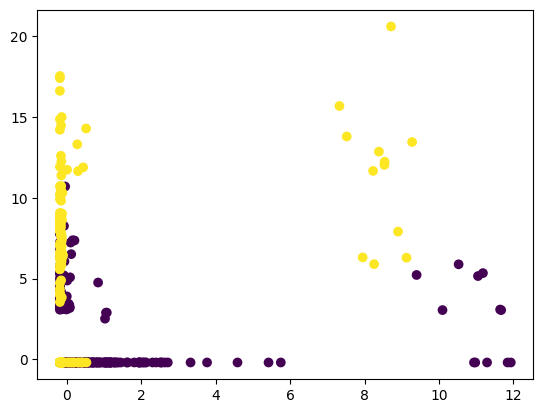

In [ ]:
plt.scatter(dataset.X_test[:,2],dataset.X_test[:,6],c = dataset.y_test)

### Sinusoid Dataset

In [ ]:
N = 1000
x = np.random.randn(N)*2
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T



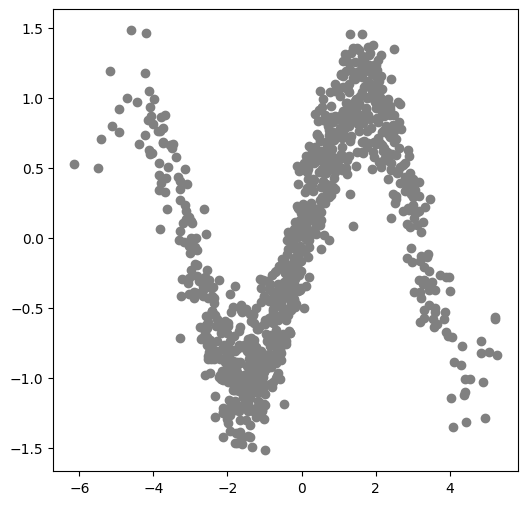

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])


plt.show()

In [ ]:
FuBIF.splitting_functions = [X2MinusSinX1Splitting,SingleDimensionHyperplane]

In [ ]:
start_time = time.time()
I=EIF(True,n_estimators=400,splitting_functions_used=[0,1])
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 2.4537107944488525 [FIT] seconds ---
--- 1.3828277587890625e-05 [PREDICT] seconds ---


FileNotFoundError: [Errno 2] No such file or directory: '/Yourpath/FuBIF/results/plots/sinusoid/2024-05-29_15-01-52_X2MinusSinX1Splitting/SingleDimensionHyperplane(n_estimators=400, max_depth=8, max_samples=256), plus=True)_score_map.png'

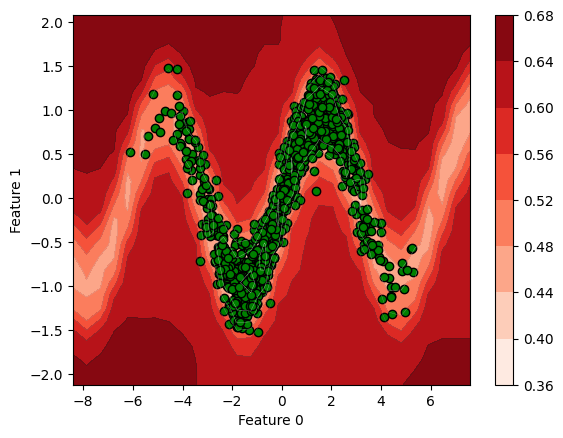

In [ ]:
plot_score_map(I,X,resolution=30,path='../results/plots/sinusoid/')

In [ ]:
I.global_importances(X)

array([0.34470517, 0.177882  ])

## Circular Splitting

In [ ]:
FuBIF.splitting_functions = [CircleSplitting]

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('cardio', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=400)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 2.7831907272338867 [FIT] seconds ---
[AVG PREC]  0.7469458919478111
--- 20.78905701637268 [PREDICT] seconds ---


In [ ]:
I.global_importances(dataset.X_test)

array([0.15811235, 0.13050151, 0.17636169, 0.13793268, 0.1402225 ,
       0.35076683, 0.16661938, 0.13183222, 0.14445772, 0.14849876,
       0.14105415, 0.14248365, 0.13881775, 0.16145216, 0.13664133,
       0.13970948, 0.16473245, 0.16422192, 0.16448267, 0.13809927,
       0.13347169])

### Sinusoid Dataset

In [ ]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)

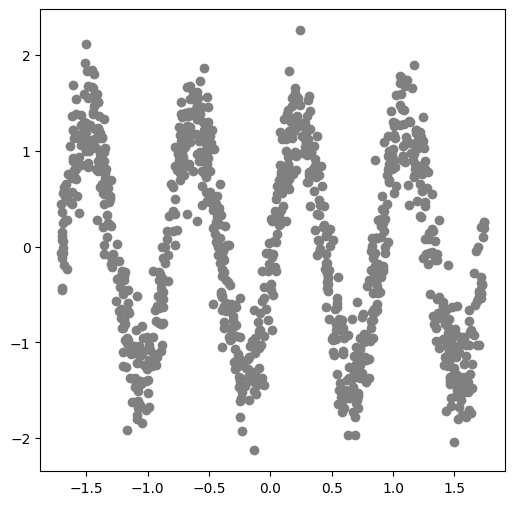

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.show()

In [ ]:
FuBIF.splitting_functions = [CircleSplitting]

In [ ]:
start_time = time.time()
I=EIF(True,n_estimators=400,splitting_functions_used=[0])
scaler = StandardScaler()
X = scaler.fit_transform(X)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 3.0633883476257324 [FIT] seconds ---
--- 1.4066696166992188e-05 [PREDICT] seconds ---


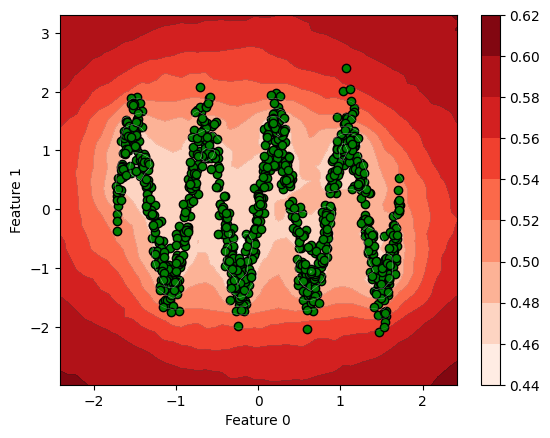

In [ ]:
from plot import plot_score_map
plot_score_map(I,X,resolution=50,path='../results/plots/sinusoid/')

## Hyperbolic Splitting

In [ ]:
FuBIF.splitting_functions = [HyperbolicSplitting]

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('cardio', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=400)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 3.541290044784546 [FIT] seconds ---
[AVG PREC]  0.6506902035963386
--- 33.70900297164917 [PREDICT] seconds ---


In [ ]:
I.global_importances(dataset.X_test)

array([0.1597077 , 0.13753446, 0.44478794, 0.16297676, 0.20637683,
       0.62239008, 0.76398613, 0.16475985, 0.20437008, 0.14935714,
       0.16591954, 0.14782096, 0.12465217, 0.17329332, 0.1732126 ,
       0.21067311, 0.17687386, 0.16833716, 0.17528152, 0.28121391,
       0.17118885])

### Sinusoid Dataset

In [ ]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)

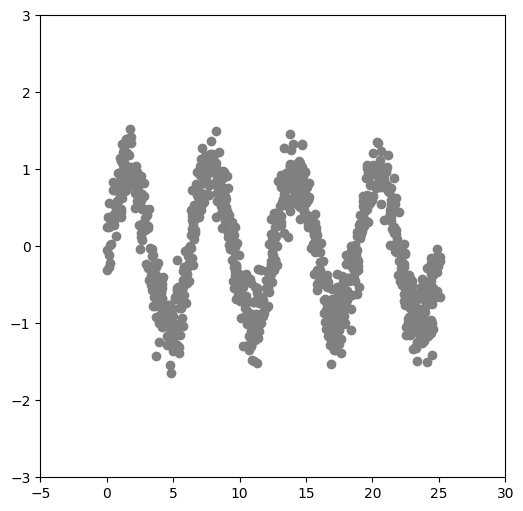

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,30])
plt.ylim([-3.,3.])

plt.show()

In [ ]:
start_time = time.time()
I=EIF(True,n_estimators=400,splitting_functions_used=[0])
scaler = StandardScaler()
X = scaler.fit_transform(X)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 2.9661977291107178 [FIT] seconds ---
--- 1.4066696166992188e-05 [PREDICT] seconds ---


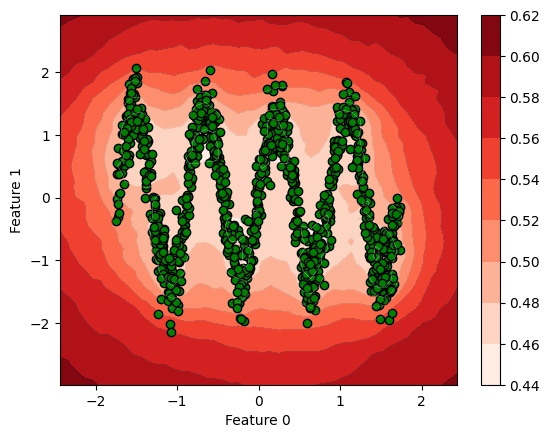

In [ ]:
from plot import plot_score_map
plot_score_map(I,X,resolution=50,path='../results/plots/sinusoid/')

## Paraboloid Splitting

In [ ]:
FuBIF.splitting_functions = [ParaboloidSplitting]

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('cardio', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=400)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 3.892465829849243 [FIT] seconds ---
[AVG PREC]  0.7648533174267462
--- 23.924285888671875 [PREDICT] seconds ---


In [ ]:
I.global_importances(dataset.X_test)

array([0.25088041, 0.14090415, 0.39287019, 0.17137769, 0.15684307,
       1.47413899, 0.33704544, 0.13599991, 0.18236095, 0.23116493,
       0.1492067 , 0.19569273, 0.15934211, 0.25761578, 0.15975216,
       0.13811335, 0.26795503, 0.24783595, 0.26334528, 0.1973779 ,
       0.17035612])

### Sinusoid Dataset

In [ ]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)

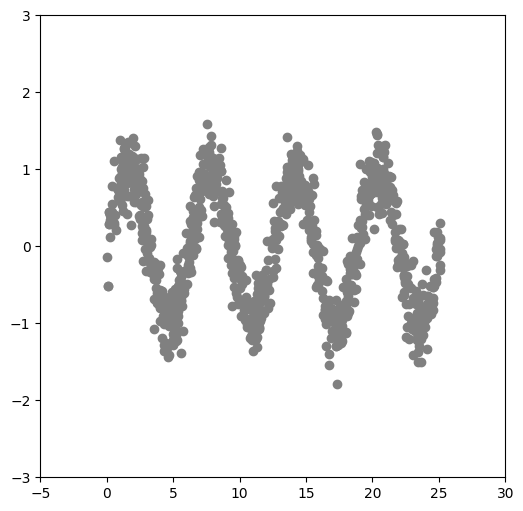

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,30])
plt.ylim([-3.,3.])

plt.show()

In [ ]:
start_time = time.time()
I=EIF(True,n_estimators=400,splitting_functions_used=[0])
scaler = StandardScaler()
X = scaler.fit_transform(X)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 2.799251079559326 [FIT] seconds ---
--- 1.2874603271484375e-05 [PREDICT] seconds ---


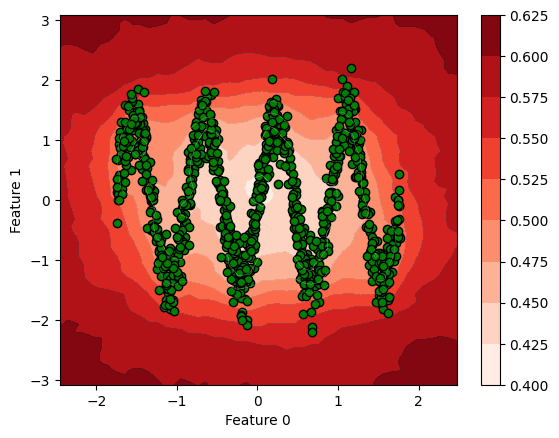

In [ ]:
from plot import plot_score_map
plot_score_map(I,X,resolution=50,path='../results/plots/sinusoid/')

## Conic Splitting

In [ ]:
FuBIF.splitting_functions = [ConicSplitting]

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('cardio', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=400)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

In [ ]:
I.global_importances(dataset.X_test)

### Sinusoid Dataset

In [ ]:
N = 1000
x = np.random.rand(N)*10*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: name 'np' is not defined

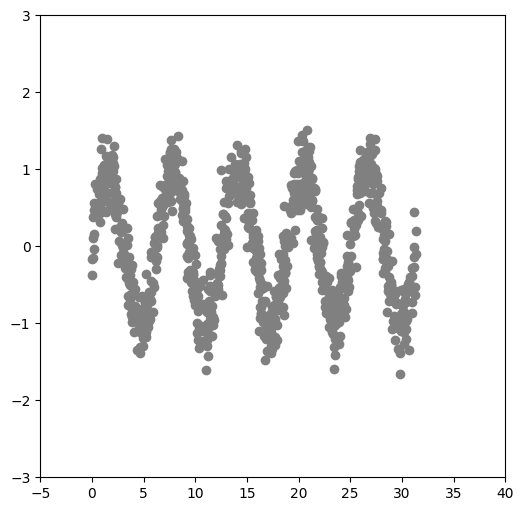

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,40])
plt.ylim([-3.,3.])

plt.show()

In [ ]:
start_time = time.time()
I=EIF(True,n_estimators=400,splitting_functions_used=[0])
scaler = StandardScaler()
X = scaler.fit_transform(X)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 3.154902935028076 [FIT] seconds ---
--- 1.8835067749023438e-05 [PREDICT] seconds ---


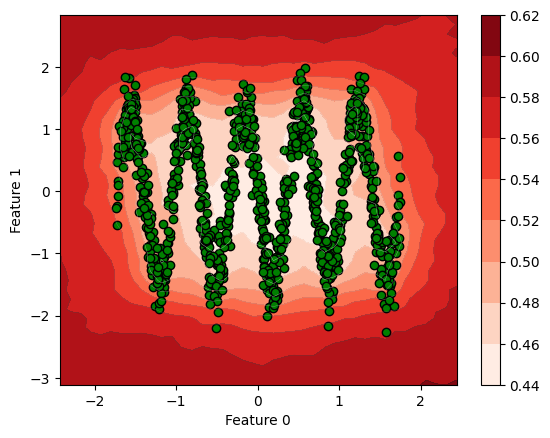

In [ ]:
from plot import plot_score_map
plot_score_map(I,X,resolution=40,path='../results/plots/sinusoid/')

### Prove

[ 1.53251336 -1.14989868] [-1.92988097  0.3930045 ]


(-14.0, 14.0)

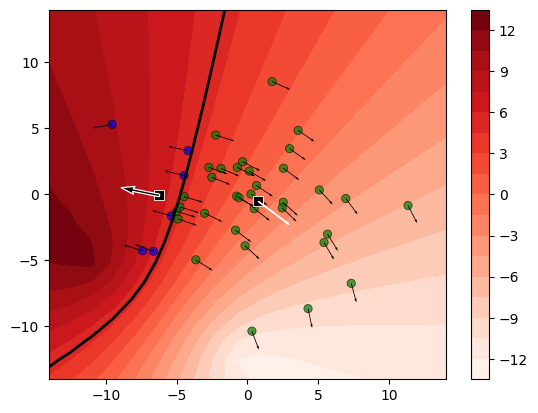

In [ ]:
c = HyperbolicSplitting()



resolution = 20
x_min,x_max = -10,10
y_min,y_max = -10,10
x = np.linspace(x_min-0.2*(x_max-x_min), x_max+0.2*(x_max-x_min), resolution)
y = np.linspace(y_min-0.2*(y_max-y_min), y_max+0.2*(y_max-y_min), resolution)
X_grid = np.meshgrid(x, y)
X_grid = np.array(X_grid).reshape(2, -1).T


Y_1 = np.random.randn(20,2)*3
Y_2 = np.random.randn(20,2)*5
Y = np.concatenate([Y_1,Y_2])
parameters = c.generate_parameters(X_grid)

derivative = c.Jacobian(Y,parameters)
derivative = -derivative/np.linalg.norm(derivative,axis=1)[:,np.newaxis]*2

treshold = 5
Z = c.function(X_grid,parameters)
Z = Z.reshape(resolution, resolution)
Y_pred = c.function(Y,parameters)
derivative = (-1+2*(Y_pred<treshold)[:,np.newaxis])*derivative

mean_derivative_left = np.mean(derivative[Y_pred<treshold],axis=0)
mean_derivative_right = np.mean(derivative[Y_pred>=treshold],axis=0)
mean_left = np.mean(Y[Y_pred<treshold],axis=0)
mean_right = np.mean(Y[Y_pred>=treshold],axis=0)

print(mean_derivative_left,mean_derivative_right)

plt.contourf(x, y, Z, cmap="Reds", levels=20)
plt.colorbar(cmap="Reds")
plt.scatter(Y[:,0],Y[:,1],color=['green' if x<treshold else "blue" for x in c.function(Y,parameters)],linewidth=0.5,edgecolors='black',alpha = 0.7)
plt.quiver(Y[:,0],Y[:,1],derivative[:,0],derivative[:,1],color='black',width=0.002,scale = 40)
plt.scatter(mean_left[0],mean_left[1],color='black',edgecolors='white',linewidth=0.6, marker='s',s=50)
plt.quiver(mean_left[0],mean_left[1],mean_derivative_left[0],mean_derivative_left[1],color='black',width=0.001*(len(Y_pred)/sum(Y_pred<treshold)),scale = 20,alpha=1,edgecolor='white', linewidth=0.9)
plt.scatter(mean_right[0],mean_right[1],color='black',edgecolors='white',linewidth=0.6, marker='s',s=50)
plt.quiver(mean_right[0],mean_right[1],mean_derivative_right[0],mean_derivative_right[1],color='black',width=0.001*(len(Y_pred)/sum(Y_pred>=treshold)),scale = 20,alpha=1,edgecolor='white', linewidth=0.9)
plt.contour(x, y, Z, colors = "black", linewidths=2, levels=[treshold])
plt.xlim(x_min-0.2*(x_max-x_min), x_max+0.2*(x_max-x_min))
plt.ylim(y_min-0.2*(y_max-y_min), y_max+0.2*(y_max-y_min))



## NN Splitting

In [ ]:
FuBIF.splitting_functions = [NNSplitting]

### Cardio Trial

In [ ]:
start_time = time.time()
dataset = Dataset('wine', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
dataset.pre_process()


I=EIF(True,n_estimators=100)
I.fit(dataset.X_train)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

--- 5.10033106803894 [FIT] seconds ---
[AVG PREC]  0.19523889642561926
--- 22.35281014442444 [PREDICT] seconds ---


In [ ]:
I.global_importances(dataset.X_test)

array([0.12644404, 0.12257872, 0.12105336, 0.12276655, 0.1224329 ,
       0.1158304 , 0.11852869, 0.12136161, 0.13139783, 0.11930833,
       0.12569832, 0.11734544, 0.12150044])

### Sinusoid Dataset

In [ ]:
N = 1000
x = np.random.rand(N)*10*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T

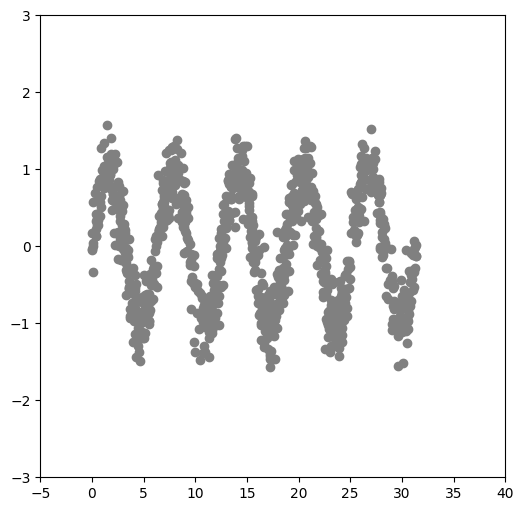

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,40])
plt.ylim([-3.,3.])

plt.show()

In [ ]:
start_time = time.time()
I=EIF(True,n_estimators=100,splitting_functions_used=[0])
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
I.fit(X)

print("--- %s [FIT] seconds ---" % (time.time() - start_time))

start_time = time.time()
#print("[AVG PREC] ",average_precision_score(dataset.y,I.predict(dataset.X_test)))
print("--- %s [PREDICT] seconds ---" % (time.time() - start_time))

/Yourpath/FuBIF/notebooks/../FuBIF.py:364: RuntimeWarning: invalid value encountered in divide
  Jacobian = Jacobian**2/np.linalg.norm(Jacobian)**2


--- 6.538287878036499 [FIT] seconds ---
--- 1.7881393432617188e-05 [PREDICT] seconds ---


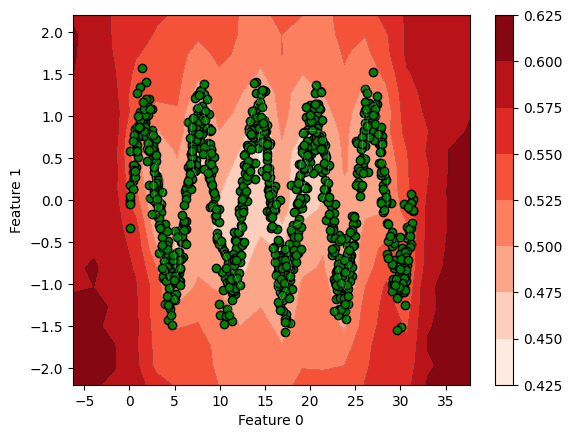

In [ ]:
from utils.plot import plot_score_map
plot_score_map(I,X,resolution=20,path='../results/plots/sinusoid/')

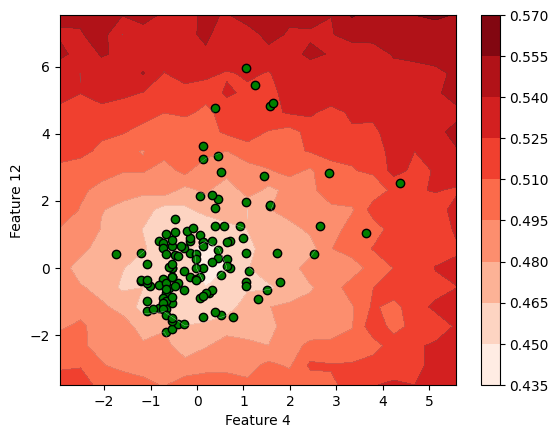

In [ ]:
from utils.plot import plot_score_map
plot_score_map(I,dataset.X_test,features=(4,12),resolution=20,path='../results/plots/wine/')

In [ ]:
import pickle
with open('../data/unused/pkl/toy_datasets.pkl', 'rb') as output:
    datasets = pickle.load(output)

In [ ]:
datasets

{'X_toy_2d': array([[-4.88304981e+00,  6.40908713e+00, -2.62670185e-01,
         -1.37169354e+00,  1.74483723e+00, -1.90039648e+00],
        [-5.20616888e+00,  4.61737823e+00,  7.34016032e-01,
         -9.71992777e-01,  4.87877027e-01,  8.42655701e-01],
        [-4.92559469e+00,  3.92989264e+00, -3.69955974e-03,
          1.16088899e+00, -1.44611919e-01, -3.86731048e-01],
        ...,
        [-6.01250359e+00, -2.63721311e+00, -6.99637396e-01,
         -2.08823514e-01, -2.49613421e-01, -1.28294336e+00],
        [-6.04842277e+00, -4.97970545e+00,  1.91116025e+00,
         -5.51519744e-02,  2.09198801e+00, -6.78155006e-01],
        [-6.62914370e+00, -3.45395449e+00,  1.92380954e-01,
         -1.11281995e+00,  3.57401615e-01, -1.97860866e-01]]),
 'X_toy_3d': array([[-4.30305769,  5.90329241,  5.15894564,  0.45614249, -0.09802368,
         -1.00859125],
        [-5.43505882,  4.6487589 ,  4.94805406, -1.35332725, -0.85811392,
          0.80619682],
        [-4.00955665,  6.29847773,  5.628

In [ ]:
plt.scatter(datasets['X'][:,0],datasets['X'][:,1],c = datasets['y'])

In [ ]:
k = 